<a href="https://colab.research.google.com/github/fatimaabuhamdeh/deep/blob/main/ML_Lab_L3_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Steps in Data Preprocessing:


1.   Importing the libraries
2.   Importing the dataset
3.   Drop Duplicate data
4.   Taking care of missing data
5.   Encoding categorical data
6.   Normalizing the data
7. Handling Imbalance data
8.   Splitting the data into test and train



Step 1: Importing the libraries

In the beginning, we’ll import three basic libraries which are very common in machine learning and will be used every time you train a model

NumPy:- it is a library that allows us to work with arrays and as most machine learning models work on arrays NumPy makes it easier

matplotlib:- this library helps in plotting graphs and charts, which are very useful while showing the result of your model

Pandas:- pandas allows us to import our dataset and also creates a matrix of features containing the dependent and independent variable (iloc[]).




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Step 2: Importing the dataset

# Download dataset from : https://github.com/suneet10/DataPreprocessing/blob/main/Data.csv

df = pd.read_csv('Data.csv')
print (df)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [ ]:
df = df.dropna(axis=0)    #بشيل ال row يلي فيه null (nan)
print(df)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
#Show duplicated rows
df.duplicated().sum()

0

In [ ]:
# Remove duplicate
df = df.drop_duplicates()

# or df.drop_duplicates(inplace = True)

**Step 3: Handling the missing values**

Handling missing data is a crucial step in data preprocessing because many machine learning algorithms cannot handle missing values. Here are some additional information and techniques for dealing with missing data:


**Identifying Missing Data:**

Before you can handle missing data, you need to identify where it exists in your dataset. Common representations of missing data include NaN (Not a Number) in numerical data or a specific placeholder (e.g., "NA" or "null") in categorical data.

**Understanding the Nature of Missingness:**

It's important to understand why data is missing.

**How to Handle Missing data :**

- Removing Rows with Missing Values: One straightforward approach is to simply remove the rows that contain missing values. However, this should be done with caution, as it can lead to loss of valuable information.

- Imputation: Imputation involves filling in the missing values with estimated or calculated values. There are various techniques for imputation:

  1- Mean/Median Imputation: Replace missing values with the mean (for numerical data) or median (less sensitive to outliers) of the column.

  2- Mode Imputation: Replace missing categorical values with the mode (most frequent value) of the column.

  3- Forward Fill/Backward Fill: Propagate the last known value forward or backward in a time series dataset.

  4- K-Nearest Neighbors (KNN) Imputation: Fill missing values based on the values of their k-nearest neighbors in feature space.

  5- Prediction-Based Imputation: Use a model to predict missing values based on the values of other features. Common approaches include regression-based imputation and Random Forest imputation.

  6- Multiple Imputation: This technique involves creating multiple imputations for each missing value, resulting in several complete datasets. The final analysis is then performed on each of these datasets, and the results are combined.

  7- Filling with the help of Domain Expert Knowledge

  8- Filling with Random Values

  9- Filling with Zeros or Specific Values

  10- Filling with Normal Values



Choosing the right technique for filling missing data depends on several factors, including the nature of the data, the problem domain, the reason for the missing values, and the potential impact on the analysis.


In [ ]:
#Show NaN values
df.isna().sum()

#or df.isnull().sum()    بشوف ال columns يلي فيها null

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
# Removing Rows with Missing Values

## Code
df = df.dropna(axis=0)


In [ ]:
df.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

In [ ]:
print(df)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [ ]:
# Mean/Median Imputation
# Create a sample DataFrame with missing data
data = {'A': [1, None, 3, None, 5],
        'B': [None, 2, None, 4, None],
        'C': [1, None, None, 4, 5]}

df = pd.DataFrame(data)

# Mean imputation
mean_imputed = df.fillna(df.mean())

# Median imputation
median_imputed = df.fillna(df.median())

print("Original DataFrame:")
print(df)

print("\nDataFrame after Mean Imputation:")
print(mean_imputed)

print("\nDataFrame after Median Imputation:")
print(median_imputed)


Original DataFrame:
     A    B    C
0  1.0  NaN  1.0
1  NaN  2.0  NaN
2  3.0  NaN  NaN
3  NaN  4.0  4.0
4  5.0  NaN  5.0

DataFrame after Mean Imputation:
     A    B         C
0  1.0  3.0  1.000000
1  3.0  2.0  3.333333
2  3.0  3.0  3.333333
3  3.0  4.0  4.000000
4  5.0  3.0  5.000000

DataFrame after Median Imputation:
     A    B    C
0  1.0  3.0  1.0
1  3.0  2.0  4.0
2  3.0  3.0  4.0
3  3.0  4.0  4.0
4  5.0  3.0  5.0


In [ ]:
# Mode Imputation

import pandas as pd

# Create a sample DataFrame with missing data
data = {'A': [1, None, 3, None, 5, 1],
        'B': [None, 2, None, 4, None, 2],
        'C': [1, 2, 2, None, 5, 6]}

df = pd.DataFrame(data)

# Mode imputation
mode_imputed = df.fillna(df.mode().iloc[0])

print("Original DataFrame:")
print(df)

print("\nDataFrame after Mode Imputation:")
print(mode_imputed)


Original DataFrame:
     A    B    C
0  1.0  NaN  1.0
1  NaN  2.0  2.0
2  3.0  NaN  2.0
3  NaN  4.0  NaN
4  5.0  NaN  5.0
5  1.0  2.0  6.0

DataFrame after Mode Imputation:
     A    B    C
0  1.0  2.0  1.0
1  1.0  2.0  2.0
2  3.0  2.0  2.0
3  1.0  4.0  2.0
4  5.0  2.0  5.0
5  1.0  2.0  6.0


In [ ]:
# Forward Fill
import pandas as pd

# Create a sample DataFrame with missing data
data = {'A': [1, None, 3, None, 5],
        'B': [None, 2, None, 4, None],
        'C': [1, None, None, 4, 5]}

df = pd.DataFrame(data)

# Perform forward fill
df_filled = df.ffill()   #or df_filled = df.fillna(method='ffill'))

print("Original DataFrame:")
print(df)

print("\nDataFrame after Forward Fill:")
print(df_filled)

## Code

Original DataFrame:
     A    B    C
0  1.0  NaN  1.0
1  NaN  2.0  NaN
2  3.0  NaN  NaN
3  NaN  4.0  4.0
4  5.0  NaN  5.0

DataFrame after Forward Fill:
     A    B    C
0  1.0  NaN  1.0
1  1.0  2.0  1.0
2  3.0  2.0  1.0
3  3.0  4.0  4.0
4  5.0  4.0  5.0


In [ ]:
# Backward Fill
# Create a sample DataFrame with missing data
data = {'A': [1, 2, None, 4, None, 6],
        'B': [None, 2, 3, None, None, 5],
        'C': [1, 2, None, None, 5, 6]}

df = pd.DataFrame(data)

# Perform backward fill
df_filled = df.bfill()   #or df_filled = df.fillna(method='bfill')

print("Original DataFrame:")
print(df)

print("\nDataFrame after Backward Fill:")
print(df_filled)


Original DataFrame:
     A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  2.0
2  NaN  3.0  NaN
3  4.0  NaN  NaN
4  NaN  NaN  5.0
5  6.0  5.0  6.0

DataFrame after Backward Fill:
     A    B    C
0  1.0  2.0  1.0
1  2.0  2.0  2.0
2  4.0  3.0  5.0
3  4.0  5.0  5.0
4  6.0  5.0  5.0
5  6.0  5.0  6.0


K-Nearest Neighbors (KNN) Imputation:

- Define a Distance Metric: You need to choose a distance metric to measure the similarity between data points. Common distance metrics include Euclidean distance, Manhattan distance, or other custom-defined metrics.


- Select the Number of Neighbors (K): This is a hyperparameter that you need to specify. It determines how many neighboring data points will be considered when imputing the missing value. The choice of K can impact the imputation results.


- Find Nearest Neighbors: For each observation with a missing value, you calculate the distance to all other observations in the dataset. Then, you select the K closest neighbors.


- Impute Missing Value: Once you have the K nearest neighbors, you can impute the missing value by taking an average (for numerical variables) or mode (for categorical variables) of the values of that variable in the neighbors.


- Repeat for All Missing Values

In [ ]:
from sklearn.impute import KNNImputer    #xgboots
import pandas as pd

# Create a sample DataFrame with missing data
data = {'A': [1, None, 3, None, 5],
        'B': [None, 2, None, 4, None],
        'C': [1, None, None, 4, 5]}

df = pd.DataFrame(data)

# Initialize the KNNImputer with desired number of neighbors (K)
imputer = KNNImputer(n_neighbors=2)   # بياخذ أقرب نقطتين له

# Perform KNN imputation
imputed_data = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)   #or imputed_data = imputer.fit_transform(df[['A','B','C']])


# Convert the result back to a DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

print("Original DataFrame:")
print(df)

print("\nDataFrame after KNN Imputation:")
print(df_imputed)


Original DataFrame:
     A    B    C
0  1.0  NaN  1.0
1  NaN  2.0  NaN
2  3.0  NaN  NaN
3  NaN  4.0  4.0
4  5.0  NaN  5.0

DataFrame after KNN Imputation:
     A    B         C
0  1.0  3.0  1.000000
1  3.0  2.0  3.333333
2  3.0  3.0  3.333333
3  3.0  4.0  4.000000
4  5.0  3.0  5.000000


Here are steps you can follow to perform prediction-based imputation:

- Split Data: Divide your dataset into two parts - one with complete data (training set) and the other with missing values (test set).

- Select Features: Identify the features (columns) that will be used to predict the missing values. These features should not contain any missing values themselves.

- Train a Model: Use a suitable machine learning algorithm (e.g., regression, decision tree, etc.) to build a predictive model. The model will be trained on the complete data to predict the missing values.

- Predict Missing Values: Apply the trained model to the test set (data with missing values) to predict the missing values.

- Replace Missing Values: Replace the missing values in the original dataset with the predicted values.

In [ ]:
# Create a sample DataFrame with missing data
data = {'A': [1, None, 3, None, 5],
        'B': [None, 2, None, 4, None],
        'C': [1, None, None, 4, 5]}


print("Original DataFrame:")
print(df)

df_imputed = df.fillna(np.random.random())

print("\nDataFrame after Filling:")
print(df_imputed)


Original DataFrame:
     A    B    C
0  1.0  NaN  1.0
1  NaN  2.0  2.0
2  3.0  NaN  2.0
3  NaN  4.0  NaN
4  5.0  NaN  5.0
5  1.0  2.0  6.0

DataFrame after Filling:
          A         B         C
0  1.000000  0.834467  1.000000
1  0.834467  2.000000  2.000000
2  3.000000  0.834467  2.000000
3  0.834467  4.000000  0.834467
4  5.000000  0.834467  5.000000
5  1.000000  2.000000  6.000000


Encoding categorical data is an important preprocessing step when working with machine learning algorithms, as most algorithms require numerical input. Categorical data refers to variables that can take on a limited set of discrete values, such as colors, types of fruit, or categories like "yes" and "no".

There are several common methods for encoding categorical data:

- One-Hot Encoding:

One-hot encoding is used for categorical variables with no inherent ordinal relationship. It creates binary columns for each category and assigns a 1 or 0 to indicate the presence or absence of that category.
For example, if you have a "Color" variable with categories "Red", "Green", and "Blue", it would be encoded as three binary columns: "Color_Red", "Color_Green", and "Color_Blue".

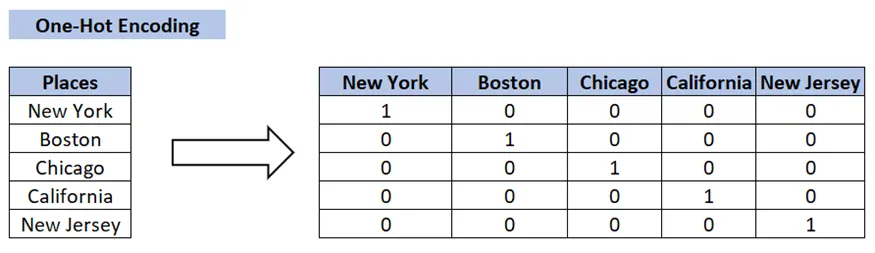

- Label Encoding:

Label encoding is suitable when there is an ordinal relationship between the categories. It assigns a unique integer to each category.
For example, if you have a variable "Size" with categories "Small", "Medium", and "Large", you could assign 0, 1, and 2 to represent these categories.

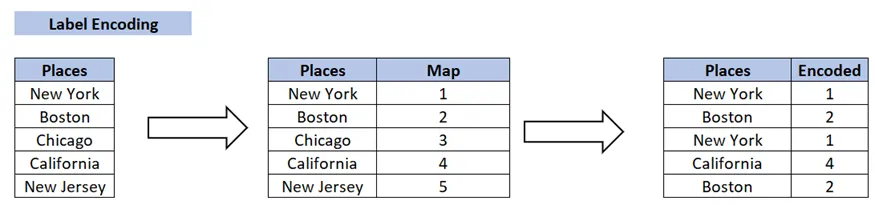

In [ ]:
import pandas as pd

data = {'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']}
df = pd.DataFrame(data)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Color'])

print (df)
print(df_encoded)

   Color
0    Red
1  Green
2   Blue
3  Green
4    Red
   Color_Blue  Color_Green  Color_Red
0           0            0          1
1           0            1          0
2           1            0          0
3           0            1          0
4           0            0          1


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Creating a more complex DataFrame
data = {
    'Name': ['John', 'Jane', 'Bob', 'Alice', 'Eve'],
    'Age': [25, 30, 35, 40, 45],
    'City': ['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Seattle'],
    'Category': ['A', 'B', 'A', 'C', 'B'],
    'Income': [50000, 60000, 70000, 80000, 90000],
    'Education': ['Masters', 'Bachelors', 'PhD', 'Bachelors', 'Masters']
}

df = pd.DataFrame(data)
print ("original Dataframe\n" , df)
# One-hot encoding the 'City' column

df = pd.get_dummies(df, columns=['City'])

print(df)

original Dataframe
     Name  Age           City Category  Income  Education
0   John   25       New York        A   50000    Masters
1   Jane   30    Los Angeles        B   60000  Bachelors
2    Bob   35        Chicago        A   70000        PhD
3  Alice   40  San Francisco        C   80000  Bachelors
4    Eve   45        Seattle        B   90000    Masters
    Name  Age Category  Income  Education  City_Chicago  City_Los Angeles  \
0   John   25        A   50000    Masters             0                 0   
1   Jane   30        B   60000  Bachelors             0                 1   
2    Bob   35        A   70000        PhD             1                 0   
3  Alice   40        C   80000  Bachelors             0                 0   
4    Eve   45        B   90000    Masters             0                 0   

   City_New York  City_San Francisco  City_Seattle  
0              1                   0             0  
1              0                   0             0  
2              0

In [ ]:
# Label encoding the 'Education' column
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])

print(df)

    Name  Age Category  Income  Education  City_Chicago  City_Los Angeles  \
0   John   25        A   50000          1             0                 0   
1   Jane   30        B   60000          0             0                 1   
2    Bob   35        A   70000          2             1                 0   
3  Alice   40        C   80000          0             0                 0   
4    Eve   45        B   90000          1             0                 0   

   City_New York  City_San Francisco  City_Seattle  
0              1                   0             0  
1              0                   0             0  
2              0                   0             0  
3              0                   1             0  
4              0                   0             1  


Normalization is a common preprocessing step when working with numerical data, especially for machine learning algorithms. It scales the numerical features to a standard range, typically between 0 and 1, to ensure that all features have equal importance and to make the data more amenable to machine learning algorithms. There are various methods for normalizing data, and one common method is Min-Max scaling.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = {
    'Name': ['John', 'Jane', 'Bob', 'Alice'],
    'Age': [30, 25, 35, 28],
    'Income': [50000, 60000, 70000, 80000],
    'Is_Employed': [True, True, False, True],
    'City': ['New York', 'San Francisco', 'Los Angeles', 'Chicago'],
        'State': ['NY', 'CA', 'CA', 'IL']
}

# Create the dataframe
df = pd.DataFrame(data)
print(df)
# Initialize the scaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to specific columns
columns_to_normalize = ['Age', 'Income']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df)

    Name  Age  Income  Is_Employed           City State
0   John   30   50000         True       New York    NY
1   Jane   25   60000         True  San Francisco    CA
2    Bob   35   70000        False    Los Angeles    CA
3  Alice   28   80000         True        Chicago    IL
    Name  Age    Income  Is_Employed           City State
0   John  0.5  0.000000         True       New York    NY
1   Jane  0.0  0.333333         True  San Francisco    CA
2    Bob  1.0  0.666667        False    Los Angeles    CA
3  Alice  0.3  1.000000         True        Chicago    IL


Z-Score (Standardization):

Z-Score normalization (or standardization) scales the data to have a mean of 0 and a standard deviation of 1. This is useful when the features have a Gaussian distribution.

In [ ]:
from sklearn.preprocessing import StandardScaler

data = {
    'Name': ['John', 'Jane', 'Bob', 'Alice'],
    'Age': [30, 25, 35, 28],
    'Income': [50000, 60000, 70000, 80000],
    'Is_Employed': [True, True, False, True],
    'City': ['New York', 'San Francisco', 'Los Angeles', 'Chicago'],
        'State': ['NY', 'CA', 'CA', 'IL']
}

# Create the dataframe
df = pd.DataFrame(data)
print(df)
# Initialize the scaler
scaler = StandardScaler()


# Apply Min-Max scaling to specific columns
columns_to_normalize = ['Age', 'Income']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df)

    Name  Age  Income  Is_Employed           City State
0   John   30   50000         True       New York    NY
1   Jane   25   60000         True  San Francisco    CA
2    Bob   35   70000        False    Los Angeles    CA
3  Alice   28   80000         True        Chicago    IL
    Name       Age    Income  Is_Employed           City State
0   John  0.137361 -1.341641         True       New York    NY
1   Jane -1.236245 -0.447214         True  San Francisco    CA
2    Bob  1.510966  0.447214        False    Los Angeles    CA
3  Alice -0.412082  1.341641         True        Chicago    IL


In [ ]:
# Handling Imbalance data

# Will be discussed later

In [ ]:
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)
# Selecting columns I am interested in
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']
print(df.head(10))

           id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7 

In [ ]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
X = df.loc[:, features]    #كل الصفوف وفقط عمود ال features
y = df.loc[:, ['price']]
print(X,y)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors
0             3       1.00         1180      5650     1.0
1             3       2.25         2570      7242     2.0
2             2       1.00          770     10000     1.0
3             4       3.00         1960      5000     1.0
4             3       2.00         1680      8080     1.0
...         ...        ...          ...       ...     ...
21608         3       2.50         1530      1131     3.0
21609         4       2.50         2310      5813     2.0
21610         2       0.75         1020      1350     2.0
21611         3       2.50         1600      2388     2.0
21612         2       0.75         1020      1076     2.0

[21613 rows x 5 columns]           price
0      221900.0
1      538000.0
2      180000.0
3      604000.0
4      510000.0
...         ...
21608  360000.0
21609  400000.0
21610  402101.0
21611  400000.0
21612  325000.0

[21613 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X contains features and y contains labels
X_train, X_test, y_train, y_test = train_test_split\
        (X, y, test_size=0.2, random_state=42 , shuffle=True)    #random_state إذا حطينا رقم فكل ما يخربط رح يختار نفس القيم, shuffle=true  مسموح يخربط البيانات

# X_train: Features for training
# y_train: Labels for training
# X_test: Features for testing
# y_test: Labels for testing

# test_size: The proportion of the dataset to include in the test split (0.2 means 20% for testing)
# random_state: Seed for the random number generator for reproducibility


print(X_train)
print(y_train)
print(X_test)
print(y_test)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors
6325          3       1.75         1780     13095     1.0
13473         2       1.00         1000      3700     1.0
17614         3       1.00         1080      7486     1.5
16970         3       2.25         2090      7500     1.0
20868         2       2.50         1741      1439     2.0
...         ...        ...          ...       ...     ...
11964         3       1.50         1000      6914     1.0
21575         3       2.50         3087      5002     2.0
5390          3       2.50         2120      4780     2.0
860           1       0.75          380     15000     1.0
15795         4       2.50         3130      5999     2.0

[17290 rows x 5 columns]
          price
6325   325000.0
13473  257000.0
17614  228500.0
16970  288000.0
20868  479000.0
...         ...
11964  378000.0
21575  399950.0
5390   575000.0
860    245000.0
15795  315000.0

[17290 rows x 1 columns]
       bedrooms  bathrooms  sqft_living  sqft_lot  floors
73